<a href="https://colab.research.google.com/github/Gautamadarshi/Book-Recommendation-System/blob/Adarshi/Book_Recommendendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name** -  Book Recommendation System

**Project Type** - Unsupervised

**Contribution** - Indivisual

**Created by** - GAUTAM KUMAR ADARSHI

##**Project Summary-**



This project aimed to create a book recommendation system using unsupervised learning techniques. The project involved exploring and analyzing the data, visualizing relationships between variables, and experimenting with different charts to gain insights. The data was pre-processed and cleaned to handle missing values and outliers. Several recommender systems were built, including popularity-based filtering, correlation-based recommendations, collaborative filtering using cosine similarity and k-nearest neighbors. The project demonstrated the potential of these techniques to generate personalized book recommendations for users.

The book crossing dataset comprises of 3 files: Books, Users, and Ratings. The books csv contains 271360 rows and 8 columns. The users csv contains 278858 rows and 3 columns. The ratings csv contains 1149780 rows and 3 columns. There are almost 40% missing values in the age column of the user csv.

The main objective of the project was to create a book recommendation system for users. Recommender systems are algorithms aimed at suggesting relevant items to users. They are critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

The project involved data wrangling, including renaming columns, changing datatypes, creating new columns from existing ones, and replacing errors in the data. Data visualization was used to understand the relationships between variables and gain insights from the data.

Several recommender systems were built, including popularity-based filtering, which ranks books based on their average rating and the number of ratings they have received; recommendations based on correlation, which generates recommendations for a specific book among books that have been rated a sufficient number of times; collaborative filtering using cosine similarity (User-User), which calculates the average rating for each book among the k most similar users to the input user; and collaborative filtering using k-nearest neighbors [kNN], which finds the k nearest neighbors of the input book and returns their ISBNs along with their distance to the input book.

Future work includes saving the best performing machine learning model in a pickle or joblib file format for deployment on a live server for real user interaction.


#**GitHub Link-**

# Problem Statement



During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.


##**START**

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Loading the Datasets

In [ ]:
book_url = "https://raw.githubusercontent.com/novus-afk/BookRecommender/master/Books.csv"
users_url = "https://raw.githubusercontent.com/novus-afk/BookRecommender/master/Users.csv"
ratings_url = "https://raw.githubusercontent.com/novus-afk/BookRecommender/master/Ratings.csv"

books = pd.read_csv(book_url)
users = pd.read_csv(users_url)
ratings = pd.read_csv(ratings_url)

<ipython-input-2-172146175586>:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(book_url)


Viewing My DataSet

In [ ]:
#DataSet first view
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [ ]:
books.shape

(271360, 8)

In [ ]:
users.shape

(278858, 3)

In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
books.describe

<bound method NDFrame.describe of               ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford         

In [ ]:
users.describe

<bound method NDFrame.describe of         User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]>

In [ ]:
ratings.describe

<bound method NDFrame.describe of          User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]>

In [ ]:
books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [ ]:
users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [ ]:
ratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


**Check Dublicate Values**

In [ ]:
# DataSet Dublicate Value Count
books.duplicated().sum()

0

In [ ]:
users.duplicated().sum()

0

In [ ]:
ratings.duplicated().sum()

0

# Misssing Value/Null Vlues

In [ ]:
def missing_values(dataframe):
  '''The function will calculate the missing values and present it in a tabular form '''
  # Calculate the number of missing values in each column
  missing_values_count = dataframe.isnull().sum()

  # Calculate the percentage of missing values in each column
  missing_values_percentage = round(dataframe.isnull().mean().mul(100), 2)

  # Create a table containing the number and percentage of missing values
  missing_values_table = pd.concat([missing_values_count, missing_values_percentage], axis=1)
  missing_values_table = missing_values_table.rename(columns={0: 'Count of Missing Values', 1: '[% of Total Value]'})

  # Sort the table by the percentage of missing values in descending order
  missing_values_table = missing_values_table.sort_values('[% of Total Value]', ascending=False)

  # Reset the index of the table
  missing_values_table = missing_values_table.reset_index().rename(columns={'index': 'Column Name'})

  return missing_values_table

In [ ]:
# Missing values/null values count
missing_values(books)

,Column Name,Count of Missing Values,[% of Total Value]
0,ISBN,0,0.0
1,Book-Title,0,0.0
2,Book-Author,1,0.0
3,Year-Of-Publication,0,0.0
4,Publisher,2,0.0
5,Image-URL-S,0,0.0
6,Image-URL-M,0,0.0
7,Image-URL-L,3,0.0


In [ ]:
missing_values(users)

,Column Name,Count of Missing Values,[% of Total Value]
0,Age,110762,39.72
1,User-ID,0,0.00
2,Location,0,0.00


In [ ]:
missing_values(ratings)

,Column Name,Count of Missing Values,[% of Total Value]
0,User-ID,0,0.0
1,ISBN,0,0.0
2,Book-Rating,0,0.0


In [ ]:
# visulazing the missing values
fig,(ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
sns.heatmap(books.isnull(),cbar=False, ax=ax1)
sns.heatmap(users.isnull(),cbar=False, ax=ax2)
sns.heatmap(ratings.isnull(),cbar=False, ax=ax3)
plt.show()




*   **The books csv contains number of rows are 271360 and numbers of columns are 8.**

*   **The users csv contains number of rows are 278858 and number of columns are 3.**


*   **The ratings csv contains number of rows are 1149780 and number of columns are 3.**

*   **There are almost 40% missing values in age columns of the users csv.**





#**Understanding Your Variables**

In [ ]:
# DataSet columns
books.columns

In [ ]:
users.columns

In [ ]:
ratings.columns

In [ ]:
# DataSet Describe
books.describe(include= 'all').round(2)

In [ ]:
users.describe(include='all').round(3)

In [ ]:
ratings.describe(include='all').round(2)


#**Variables Description**

The book crossing dataset comprises of 3 files.

**Books:**





*   ISBN: International standard book number(invalid ISBNs have been removed from the dataset.)

*   Book_Title: Author of the book


*   Year-of-publication: Year

*   Publisher: Publisher

*   Image-URL-S: url for small image

*   Image-URL-M: url for medium image


*   Image-URL-L: url for large image

Urls point to Amazon Website.
 **Users:**


*   User-ID: Anonymized user id(integers)

*   Location: Location if unavailable,Null

*   Age: Age of the user if unavailable,Null

**Ratings:**


*   User-ID: Anonymized user id (integers)

*   ISBN: International standard book number


*   Book-Rating: Explicit = rating on a scale of 1-10(higher value denoting higher appreciation) or implicit expressed by 0.


















# Check Unique Values for each variable.

In [ ]:
# check unique values for each variable.
def unique_values(data):
  for i in data.columns.tolist():
    print("No. of unique values in",i,"is",data[i].nunique())
  return None

In [ ]:
unique_values(books)

In [ ]:
unique_values(users)

In [ ]:
unique_values(ratings)

# **Data Wrangling**

Data wrangling Code

In [ ]:
# renaming all the columns for case of uses
books.rename(columns={'ISBN':'isbn',"Book-Title":'book_title',
                      'Book-Author':'book_author',
                      'Year-Of-Publication':'year_of_publication',
                      'Publisher':'publisher','Image-URL-S':'img_s',
                      'Image-URL-M':'img_m','Image-URL-L':'img_l'}
      , inplace=True)

In [ ]:
books.head()

In [ ]:
# changing the url from http to https for deployment
def change_url(url):
    if isinstance(url,str):
        url=url.replace('http','https')
    return url

books['img_s']=books['img_s'].apply(change_url)
books['img_m']=books['img_m'].apply(change_url)
books['img_l']=books['img_l'].apply(change_url)

In [ ]:
ratings.rename(columns={'User-ID':'user_id', 'ISBN':'isbn',
                      'Book-Rating':'book_rating'}
        , inplace=True)

In [ ]:
# rename users column
users.rename(columns={'User-ID':'user_id', 'Location':'location',
                      'Age':'age'}
        , inplace=True)

In [ ]:
books['year_of_publication'].unique( )

**Merging the Dataset**

In [ ]:
location = users.location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

users['city'] = location['city']
users['state'] = location['state']
users['country'] = location['country']

In [ ]:
users

In [ ]:
users.country.unique()

In [ ]:
data = pd.merge(users, ratings, on = 'user_id')
data = pd.merge(data, books, on = 'isbn')
data.head()

In [ ]:
data.shape

In [ ]:
# Removing the unwanted columns
data_2 = data.drop(['location','img_s','img_m','img_l'], axis = 1)

In [ ]:
data_2.head()

# What all multiplications have you done and insights you found


**Renamed all the columns for the 3 csv, changed the required datatypes for some columns.**

**Created a country,city and state columns from the location columns.**

**Replaced most of the errors in the country columns.**

**Limited the year of publication as per the book crossing dataset**


#**4 Data Visulaziation, Storytelling, & Experimenting with charts: Understanding the relationships between variables**

Chart-1  Age Distribution

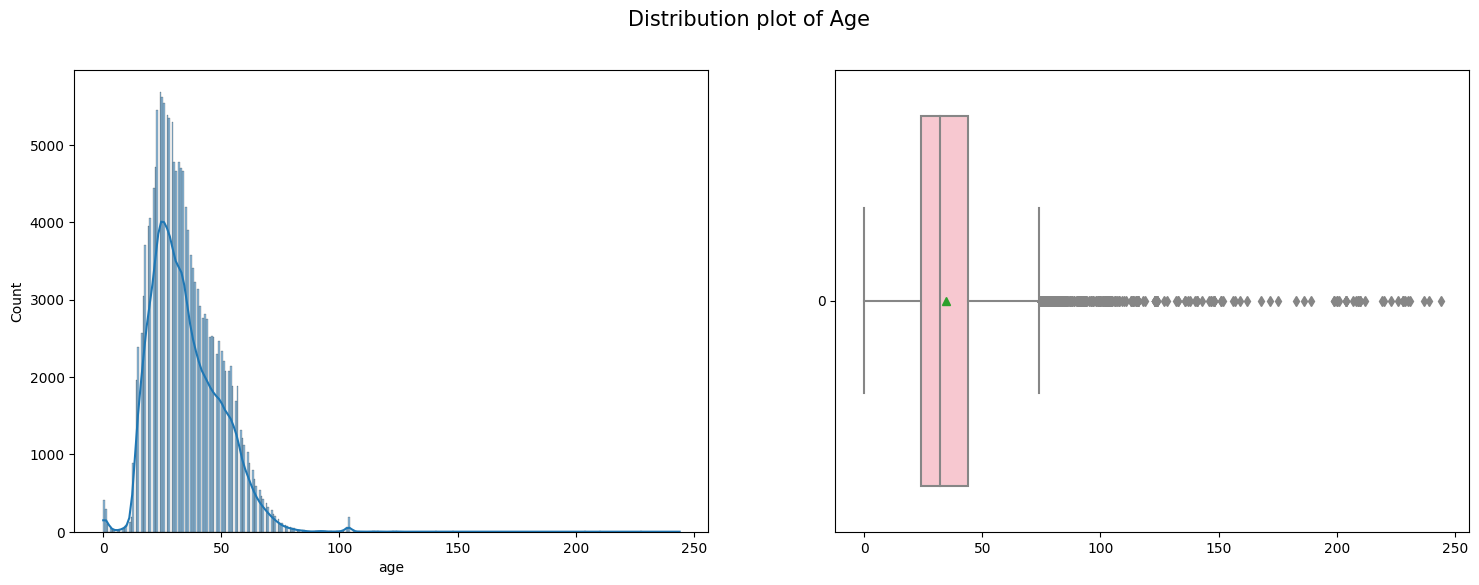

In [ ]:
# Age Distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.histplot(users['age'], ax = axes[0],kde = True)
sns.boxplot(users['age'], ax = axes[1],orient='h',showmeans=True,color='pink')
fig.suptitle("Distribution plot of Age", fontsize = 15)
plt.show()

1. Why did you pick the specific chart?

 A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.
  Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

  A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

  Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

  2. What is/are the insight(s) found from the chart?

  **From the distribution it appears that the columns is positively skewed(right skewed).**

  **The boxplot shows that there are a lot of outliers present.**

  3. Will the gained insights help creating a positive business impact?

   Are there any insights that lead to negative growth? Justify with specific reason.



The insights gained from the histogram and boxplot could potentially help in creating a positive business impact by allowing for a better understanding of the data and its distribution. Understanding the distribution of age and the presence of outliers could help in creating more accurate and personalized book recommendations for users. However, additional analysis and data may be necessary to achieve the business goal of creating an effective book recommendation system.



# Chart-2. Book Rating Distribution.

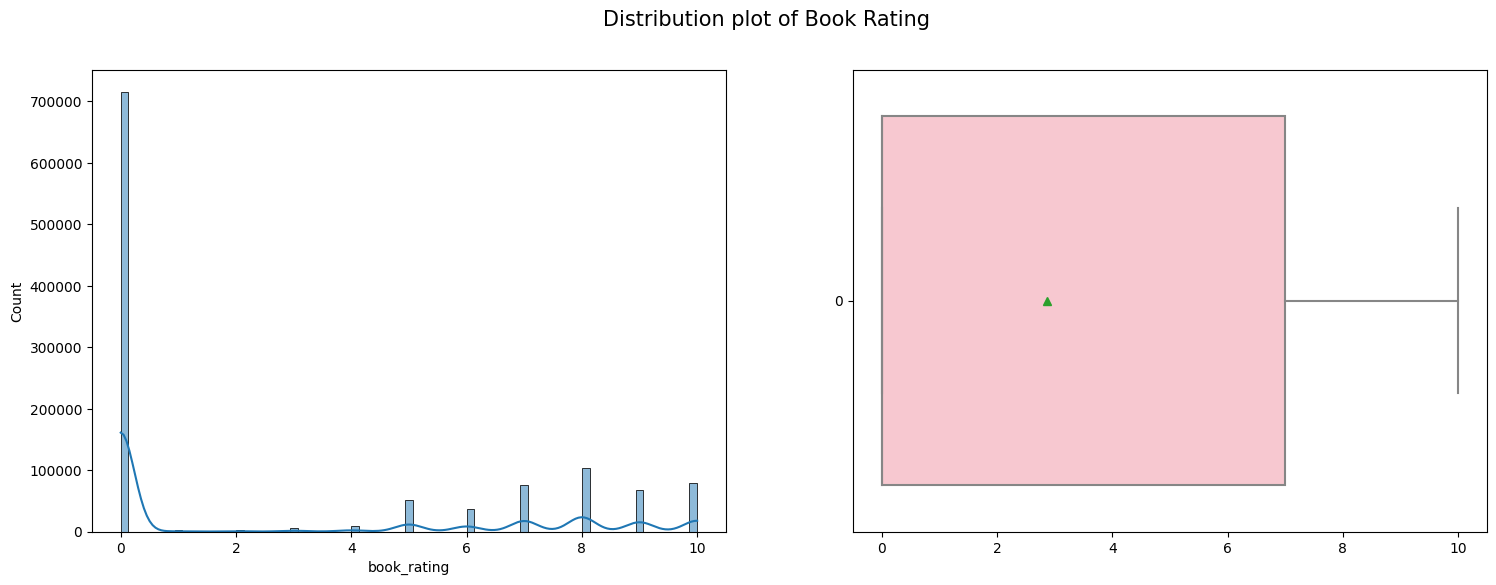

In [ ]:
# Rating Distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.histplot(ratings['book_rating'], ax = axes[0],kde = True)
sns.boxplot(ratings['book_rating'], ax = axes[1], orient='h',showmeans=True,color='pink')
fig.suptitle("Distribution plot of Book Rating", fontsize = 15)
plt.show()

1. Why you choose this specific chart?



A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.


2. What is/are insight(s) found from the chart?

**We see that there are a lot of zeros (implicit ratings) thats the reason the boxplot is flushed to the left side.**

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

These insights alone may not be sufficient to create a positive business impact and additional analysis and data may be necessary to achieve the business goal of creating an effective book recommendation system.


#Chart-3. Explicit Ratings

In [ ]:
explicit = ratings[ratings['book_rating']!=0]

In [ ]:
plt.show()

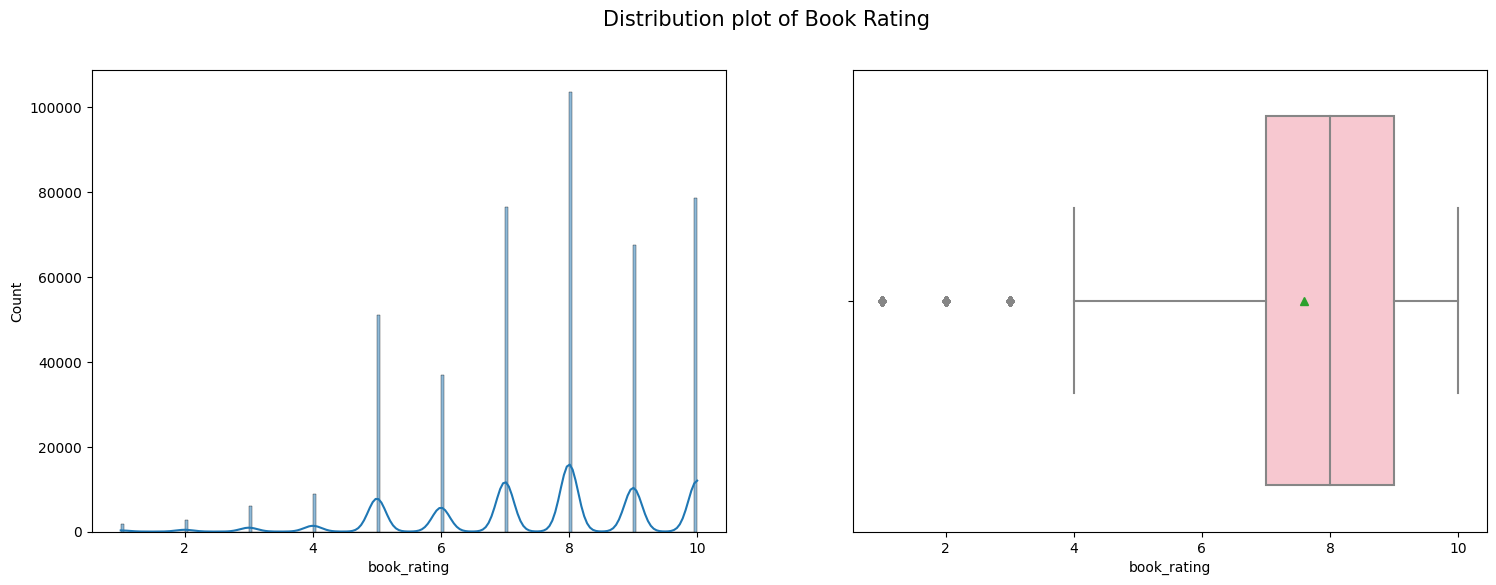

In [ ]:
# Explicit Rating Distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.histplot(explicit['book_rating'], ax = axes[0],kde = True)
sns.boxplot(x=explicit['book_rating'], ax = axes[1], orient='h', showmeans=True, color='pink')
fig.suptitle("Distribution plot of Book Rating", fontsize = 15)
plt.show()


1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.
2. What is/are the insight(s) found from the chart?

**The explicit ratings are from 1 to 10, the histogram shows that the most count of ratings is 8.**

**The boxplots shows that the median is 8 and mean is somewhere close to 7.5**
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

These insights alone may not be sufficient to create a positive business impact and additional analysis and data may be necessary to achieve the business goal of creating an effective book recommendation system.


# Chart-4. Year of Publication

In [ ]:
year = books['year_of_publication'].value_counts().reset_index()
year.columns = ['year', 'count']
year = year.sort_values(by='count', ascending=False).head(15)
year['year']='Year '+year['year'].astype(int).astype(str)

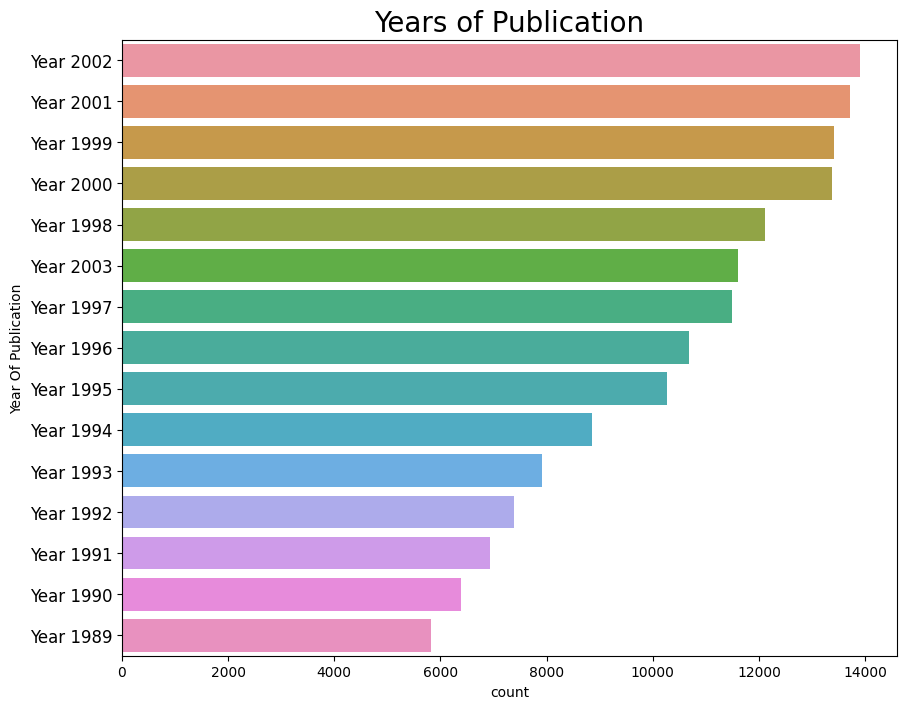

In [ ]:
# Year of publication
plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=year, orient = 'h')
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()


1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
2. What is/are the insight(s) found from the chart?

**The bar chart shows that the most number of books were published in the year 2002 followed by 1999 and 2001.**

**It appears that there are twice as many books published in 2002 than in 1989.**
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the bar chart, such as the number of books published in different years, could potentially help in creating a positive business impact by allowing for a better understanding of the data and its distribution. This information could be used to improve the recommendation system by taking into account the publication year when making recommendations.


 Function for bar plot

In [ ]:
def bar_plot(df,col,label):
    plot_df = df[col].value_counts().head(15).reset_index()
    plot_df.columns=[col,'count']

    plt.figure(figsize=(10,8))
    sns.barplot(x='count',y=col,data=plot_df)
    plt.ylabel(label)
    plt.title(label,size=20)
    plt.show()

Chart-5 .Top Book Title

In [ ]:
data_2[data_2['book_title']=='Wild Animus']['book_title'].count()

2502

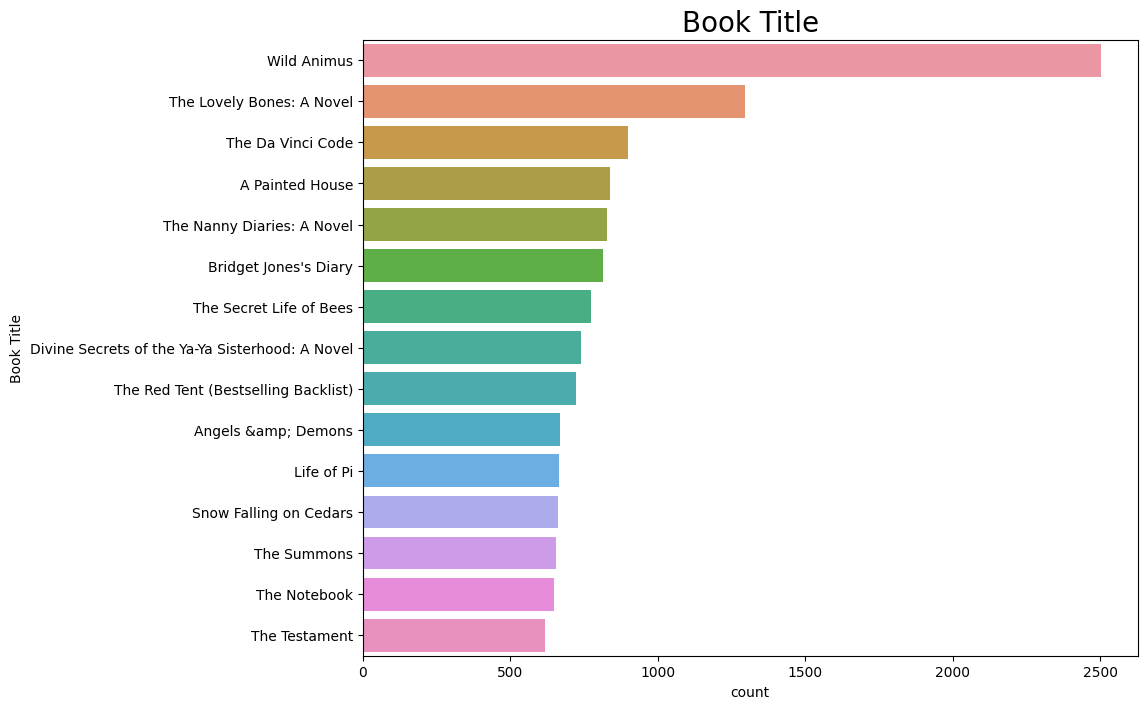

In [ ]:
# Top books by number of ratings
bar_plot(data_2, 'book_title', 'Book Title')

1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
2. What is/are the insight(s) found from the chart?

**The most rated book is Wild Animus with 2502 ratings, followed by The Lovely Bones:A Novel and The Da Vinci Code.**
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the bar chart, such as the most rated books, could potentially help in creating a positive business impact by allowing for a better understanding of the data and its distribution. This information could be used to improve the recommendation system by taking into account the popularity of books when making recommendations.


Chart-6. The Top Book Author

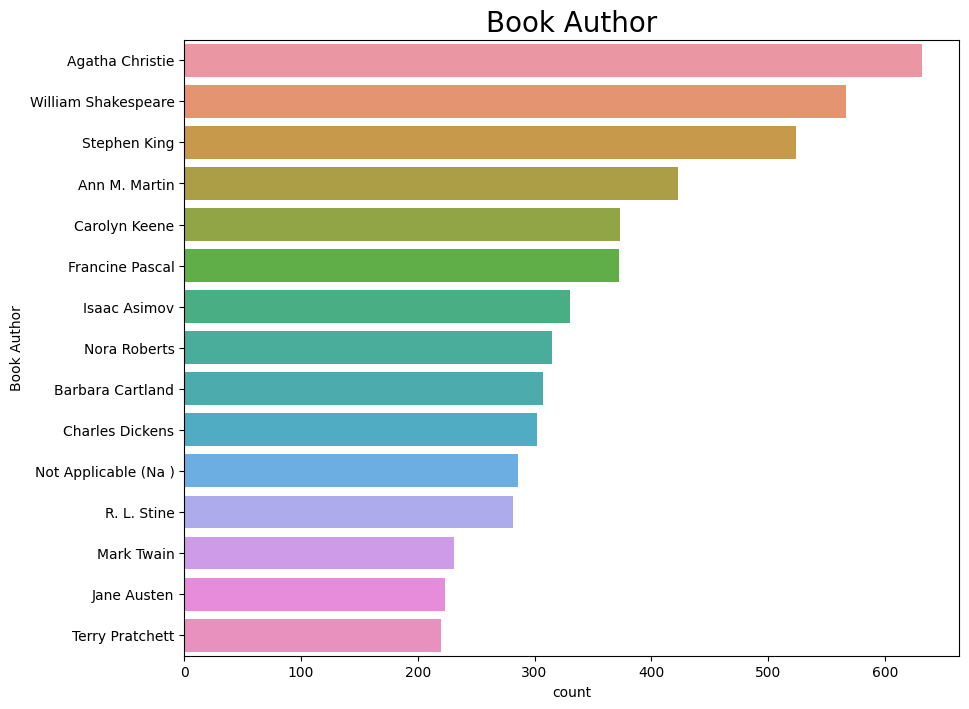

In [ ]:
# Plot of book author based on number of books
bar_plot(books, 'book_author', 'Book Author')

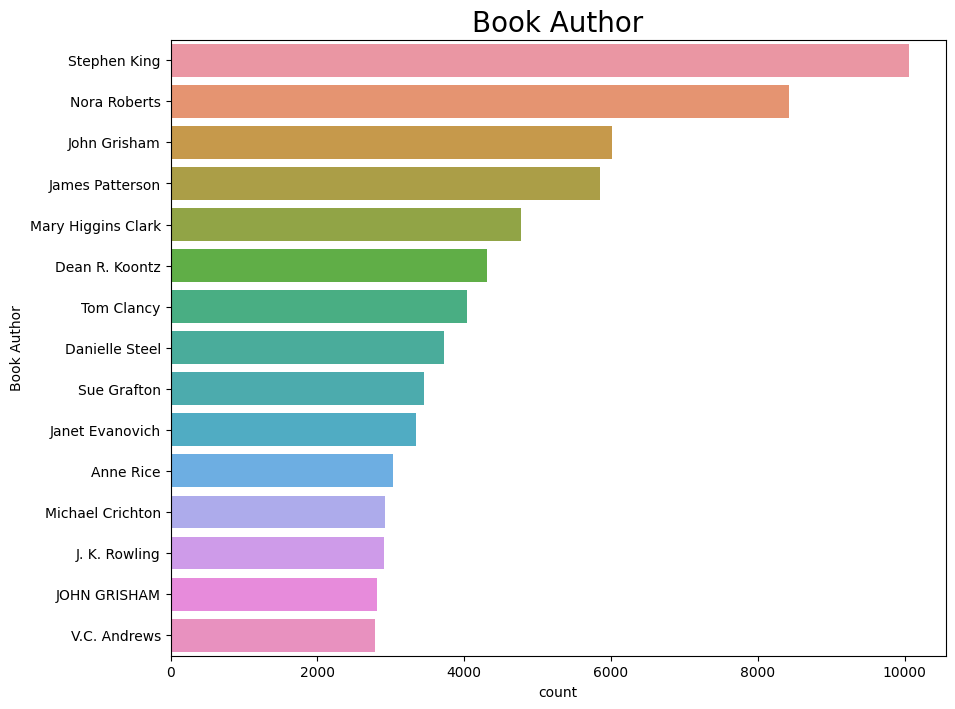

In [ ]:
# Plot of book author based on number of reviews
bar_plot(data_2, 'book_author', 'Book Author')

1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
2. What is/are the insight(s) found from the chart?

**The top author is Agatha Christie as per the number of books followed by William Shakespeare and for the most number of ratings is Nora Roberts followed by Stephen King.**
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the top authors based on the number of books and ratings, could potentially help in creating a positive business impact. This information could be used to improve the recommendation system by taking into account the popularity of authors when making recommendations. For example, books by popular authors such as Agatha Christie and Nora Roberts could be recommended to users who have shown an interest in similar genres or themes.


Chart-7. Book Publisher

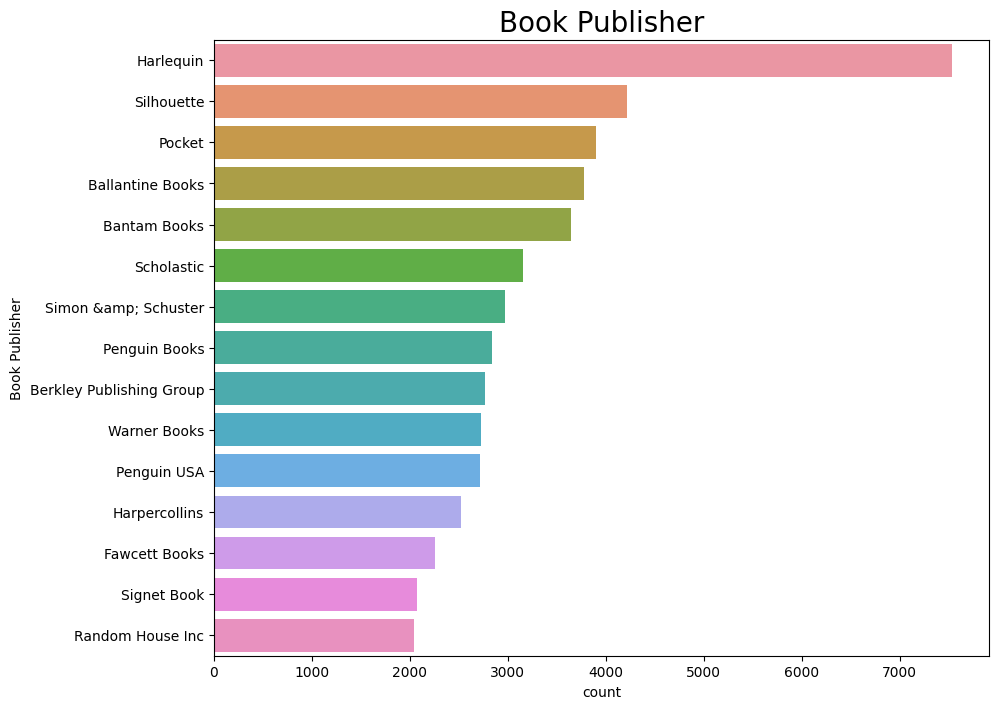

In [ ]:
# plot of book publishers based on number of books
bar_plot(books, 'publisher', 'Book Publisher')

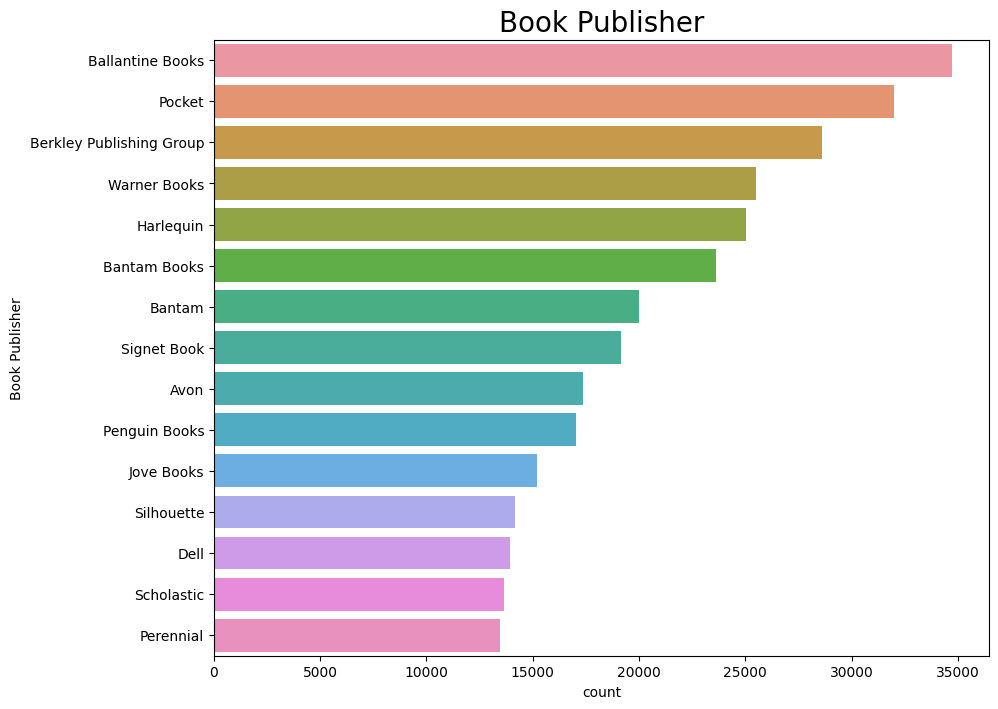

In [ ]:
# Plot of book author based on number of reviews
bar_plot(data_2, 'publisher', 'Book Publisher')

1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
2. What is/are the insight(s) found from the chart?

**The most number of books are published by Harleyquin and also the most number of rated books publisher is Harleyquin.**
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the most popular publisher based on the number of books and ratings, could potentially help in creating a positive business impact. This information could be used to improve the recommendation system by taking into account the popularity of publishers when making recommendations. For example, books published by popular publishers such as Harlequin could be recommended to users who have shown an interest in similar genres or themes.


Chart-8. Top Countries.

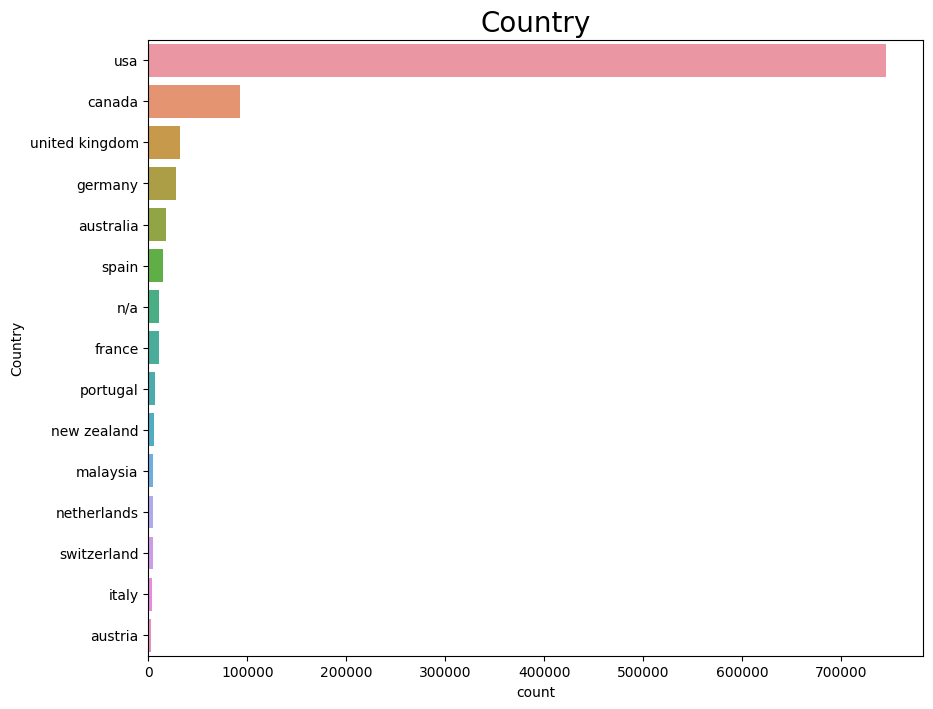

In [ ]:
# Top 10 books by number of books
bar_plot(data_2, 'country', 'Country')

1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
2. What is/are the insight(s) found from the chart?

**The most number of users are from USA followed by Canada. The remaining countries have comparatively less users who rate the books.**
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the distribution of users by country, could potentially help in creating a positive business impact. This information could be used to improve the recommendation system by taking into account the location of users when making recommendations. For example, books that are popular or relevant in specific countries such as the USA and Canada could be recommended to users from those countries.


Chart- Correlation Heatmap

<ipython-input-61-0ed0a98d32e1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_2.corr()


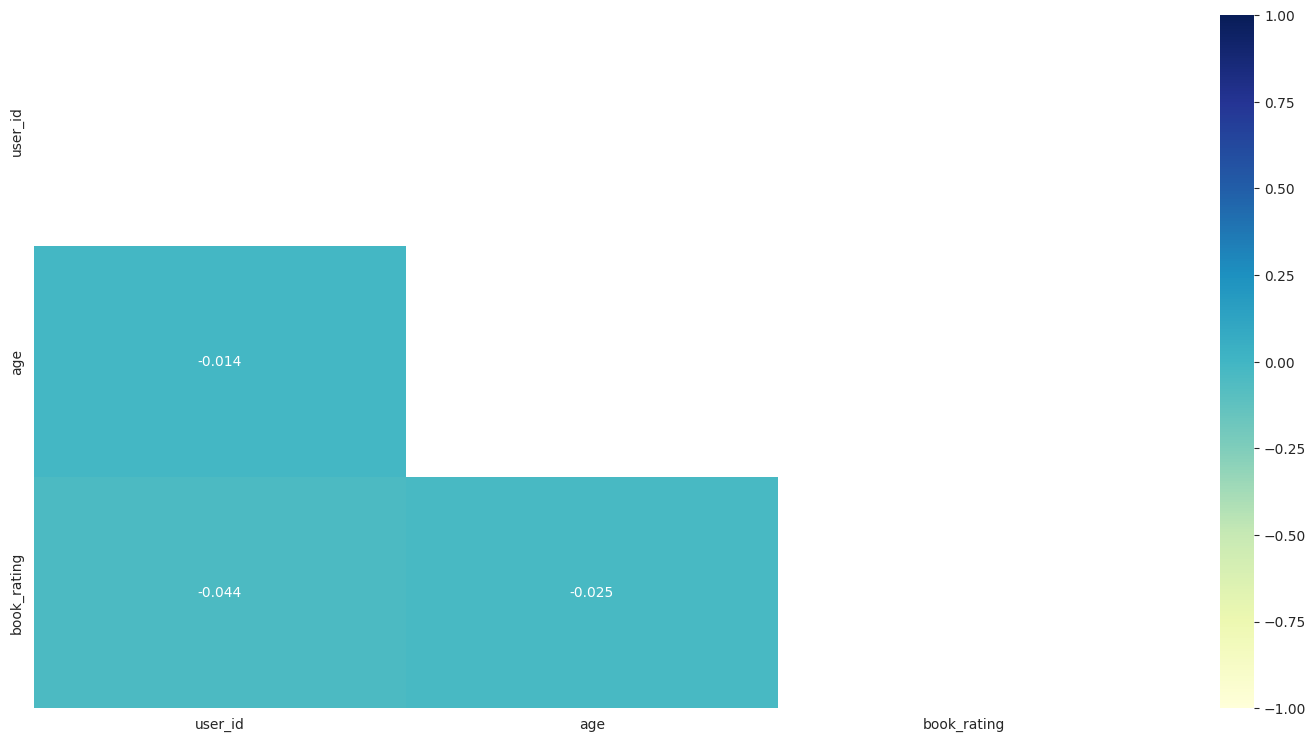

In [ ]:
# Correlation Heatmap visualization code
corr = data_2.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.
2. What is/are the insight(s) found from the chart?

**We see that the columns are not correlated to each other.**


Chart- Pair Plot

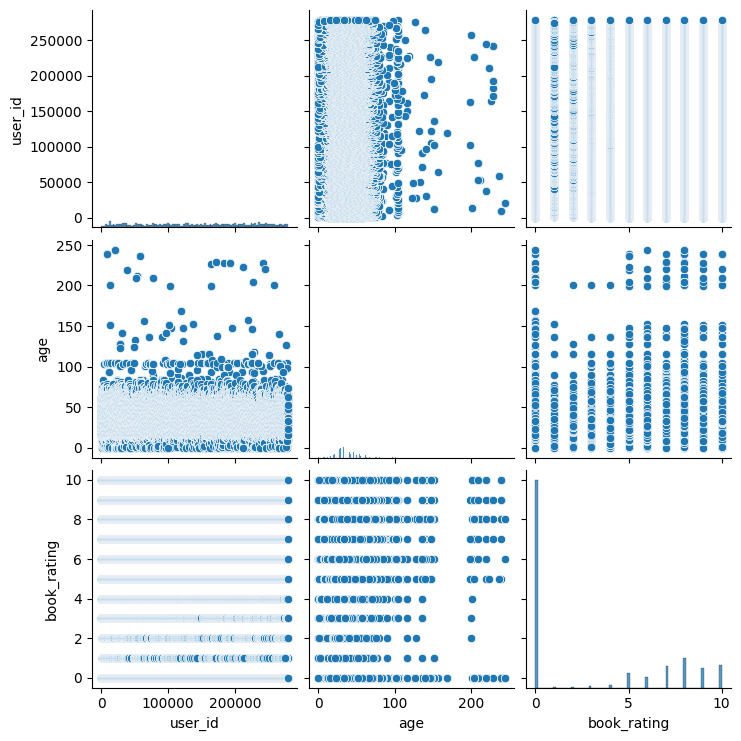

In [ ]:
# Pair Plot
sns.pairplot(data_2)
plt.show()

1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.
2. What is/are the insight(s) found from the chart?

**In the pair plot not much insight is gained.**


# **Feature Engineering & Data Processing**

# Handling Missing value and Outliers

Users

In [ ]:
missing_values (users)

,Column Name,Count of Missing Values,[% of Total Value]
0,age,110762,39.72
1,country,4577,1.64
2,user_id,0,0.00
3,location,0,0.00
4,city,0,0.00
5,state,1,0.00


In [ ]:
# replace outlier with nan
users.loc[(users.age > 100) | (users.age < 5), 'age'] = np.nan

In [ ]:
# filling the age as per the median value of country
users['age'] = users['age'].fillna(users.groupby('country')['age'].transform('median'))

In [ ]:
missing_values(users)

,Column Name,Count of Missing Values,[% of Total Value]
0,country,4577,1.64
1,age,3098,1.11
2,user_id,0,0.00
3,location,0,0.00
4,city,0,0.00
5,state,1,0.00


In [ ]:
# replacing the remaining nan values with mean
users['age'].fillna(users.age.mean(),inplace=True)

In [ ]:
# replacing unknown countries with other
users.fillna('others', inplace=True)

In [ ]:
# dropping location, city, state, columns.
users.drop(['location','city','state'], axis=1, inplace=True)

In [ ]:
missing_values(users)

,Column Name,Count of Missing Values,[% of Total Value]
0,user_id,0,0.0
1,age,0,0.0
2,country,0,0.0




**Replaced the outlier (ages less than 5 and morethan 99) in the age column with NaN. Replaced the missing age as per the median value of country. Replaced the remaining NaN values with mean age.**

**Replaced the remaining missing values in the users with 'others'**


Books

In [ ]:
missing_values(books)

,Column Name,Count of Missing Values,[% of Total Value]
0,isbn,0,0.0
1,book_title,0,0.0
2,book_author,1,0.0
3,year_of_publication,0,0.0
4,publisher,2,0.0
5,img_s,0,0.0
6,img_m,0,0.0
7,img_l,3,0.0


In [79]:
# This code will convert all the years to numeric and will put NaN for all the years that dont have any value
books['year_of_publication'] = pd.to_numeric(books['year_of_publication'],errors='coerce')

In [80]:
books['year_of_publication'].fillna(round(books['year_of_publication'].median()), inplace=True)


In [ ]:
missing_values(books)

,Column Name,Count of Missing Values,[% of Total Value]
0,isbn,0,0.0
1,book_title,0,0.0
2,book_author,1,0.0
3,year_of_publication,0,0.0
4,publisher,2,0.0
5,img_s,0,0.0
6,img_m,0,0.0
7,img_l,3,0.0


In [ ]:
# replacing nan in other columns with 'others
books.fillna('others', inplace=True)

**Replaced Years with median year and replaced remaining missing value of 'others'.**

Considering Explicit Ratings

In [75]:
ratings_explicit = ratings[ratings['book_rating']!=0]

In [76]:
ratings_explicit['avg_rating'] = ratings_explicit.groupby('isbn')['book_rating'].transform('mean')

<ipython-input-76-fede7eccc73a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit['avg_rating'] = ratings_explicit.groupby('isbn')['book_rating'].transform('mean')


In [77]:
ratings_explicit

,user_id,isbn,book_rating,avg_rating
1,276726,0155061224,5,5.000000
3,276729,052165615X,3,3.000000
4,276729,0521795028,6,6.000000
6,276736,3257224281,8,6.750000
7,276737,0600570967,6,6.000000
...,...,...,...,...
1149773,276704,0806917695,5,5.000000
1149775,276704,1563526298,9,7.000000
1149777,276709,0515107662,10,8.444444
1149778,276721,0590442449,10,9.000000




**I have used median, mean techniques to handle missing values in the dataset. I chose to use these techniques because they are appropriate for the nature of the data and the specific problem at hand. For example, I used median imputation for numerical variable(age and year of publication), as it is a robust measure of central tendency that is not affected by outliers.**


#**ML Model Implementation**

**Building Recommender System**

**Popularity Based Filtering**

In [81]:
popularity = ratings.merge(books,on='isbn')

In [82]:
# Add a column for the number of ratings for each book
popularity['num_ratings'] = popularity.groupby('isbn')['book_rating'].transform('count')

In [83]:
# adding average rating
popularity['avg_rating'] = popularity.groupby('isbn')['book_rating'].transform('mean')

In [84]:
# Calculate the mean average rating and the 90th percentile of the number of ratings
mean_rating = popularity['avg_rating'].mean()
min_ratings = popularity['num_ratings'].quantile(0.90)

In [87]:
#books with a number of ratings greater than or equal to the 90th percentile
top_rated_books = popularity.loc[popularity['num_ratings'] >= min_ratings]

In [88]:
def calc_weighted_rating(x, min_ratings=min_ratings, mean_rating=mean_rating):
    num_ratings = x['num_ratings']
    avg_rating = x['avg_rating']
    score = (num_ratings / (num_ratings + min_ratings) * avg_rating) + (min_ratings / (min_ratings + num_ratings) * mean_rating)
    return score

In [90]:
# Apply the weighted rating function to the top_rated_books DataFrame
top_rated_books['weighted_rating'] = top_rated_books.apply(calc_weighted_rating, axis=1)

# Sort the books by weighted rating in descending order
top_rated_books = top_rated_books.sort_values('weighted_rating', ascending=False)

# Remove duplicate entries for the same book
top_rated_books = top_rated_books.drop_duplicates('isbn')

<ipython-input-90-7ab037d02748>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rated_books['weighted_rating'] = top_rated_books.apply(calc_weighted_rating, axis=1)


In [91]:
# Display the top 20 books with their title, number of ratings, average rating, and weighted rating
top_20_books = top_rated_books[['book_title', 'num_ratings', 'avg_rating', 'weighted_rating']].head(20)
display(top_20_books)

,book_title,num_ratings,avg_rating,weighted_rating
194806,Harry Potter and the Goblet of Fire (Book 4),194,6.541237,5.015488
194581,Harry Potter and the Prisoner of Azkaban (Book 3),197,6.467005,4.985318
12849,Harry Potter and the Chamber of Secrets (Book 2),170,6.611765,4.935003
196733,Harry Potter and the Sorcerer's Stone (Book 1),168,6.363095,4.786549
2172,Harry Potter and the Order of the Phoenix (Boo...,334,5.571856,4.781087
13886,Harry Potter and the Sorcerer's Stone (Harry P...,571,4.900175,4.503693
8317,The Da Vinci Code,883,4.652322,4.410315
54471,Harry Potter and the Prisoner of Azkaban (Book 3),226,5.345133,4.403621
14293,To Kill a Mockingbird,389,4.920308,4.381164
7666,The Lovely Bones: A Novel,1295,4.468726,4.313844


**To rank books based on their average rating and the number of ratings they have received. The num_ratings variable represents the number of ratings a book has received, avg_rating is the average rating for that book, min_ratings is the minimum number of ratings required for an item to be considered, and mean_rating is the overall average rating across all items.**

#**Recommendations Based correlation**

In [92]:
# creating a dataframe average_rating which has avg ratings in column book_rating
average_rating = pd.DataFrame(ratings.groupby('isbn')['book_rating'].mean())
# creating a num_rating column with number of ratings
average_rating['num_rating'] = pd.DataFrame(ratings.groupby('isbn')['book_rating'].count())
average_rating.sort_values('num_rating', ascending=False).head()

,book_rating,num_rating
isbn,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [93]:
# considering users with more than 200 ratings and books with less than 100 ratings
counts1 = ratings['user_id'].value_counts()
ratings1 = ratings[ratings['user_id'].isin(counts1[counts1 >= 200].index)]
counts2 = ratings1['book_rating'].value_counts()
ratings1 = ratings1[ratings1['book_rating'].isin(counts2[counts2 >= 100].index)]

In [94]:
ratings_pivot = ratings1.pivot(index='user_id', columns='isbn').book_rating
user_id = ratings_pivot.index
isbn = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


isbn,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
user_id,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Building recommender functions with isbn and min ratings as input.

In [95]:
def recommend_books(isbn, min_ratings):
  '''The function takes isbn and min ratings as the input and returns the
  top books dataframe
  '''
  # Get the ratings for the input book
  book_ratings = ratings_pivot[isbn]

  # Calculate the Pearson correlation between the input book and all other books
  similar_to_book = ratings_pivot.corrwith(book_ratings)

  # Create a DataFrame to store the correlations
  corr_book = pd.DataFrame(similar_to_book, columns=['pearsonR'])
  corr_book.dropna(inplace=True)

  # Join with the average_rating DataFrame to get the number of ratings for each book
  corr_summary = corr_book.join(average_rating['num_rating'])

  # Filter books with a number of ratings greater than or equal to the input minimum
  top_books = corr_summary[corr_summary['num_rating'] >= min_ratings]

  # Sort the books by Pearson correlation in descending order and return the top 10
  top_books = top_books.sort_values('pearsonR', ascending=False).head(10)

  # Add the book titles to the result
  top_books = top_books.join(books.set_index('isbn')['book_title'])

  return top_books

**The above function takes input an ISBN and a minimum number of ratings and returns the top 10 books most similar to the input book based on Pearson correlation. This function can be used to generate recommendations for a specific book among books that have been rated a sufficient number of times.**

In [96]:
books[books['isbn']=='0316666343']

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",https://images.amazon.com/images/P/0316666343....,https://images.amazon.com/images/P/0316666343....,https://images.amazon.com/images/P/0316666343....


In [97]:
# Example usage: Get recommendations for the book with ISBN '0316666343' among books with at least 300 ratings
recommended_books = recommend_books('0316666343', 300)
display(recommended_books)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearsonR,num_rating,book_title
isbn,,,
0316666343,1.000000,1295,The Lovely Bones: A Novel
0312291639,0.471872,354,The Nanny Diaries: A Novel
0316601950,0.434248,568,The Pilot's Wife : A Novel
0446610038,0.429712,391,1st to Die: A Novel
0446672211,0.421478,585,Where the Heart Is (Oprah's Book Club (Paperba...
0385265700,0.351635,319,The Book of Ruth (Oprah's Book Club (Paperback))
0345342968,0.316922,321,Fahrenheit 451
0060930535,0.309860,494,The Poisonwood Bible: A Novel
0375707972,0.308145,354,The Reader


In [98]:
books[books['isbn']=='059035342X']

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
2143,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,https://images.amazon.com/images/P/059035342X....,https://images.amazon.com/images/P/059035342X....,https://images.amazon.com/images/P/059035342X....


In [99]:
# Example usage: Get recommendations for the book with ISBN '059035342X' among books with at least 400 ratings
recommended_books = recommend_books('059035342X', 400)
display(recommended_books)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearsonR,num_rating,book_title
isbn,,,
059035342X,1.000000,571,Harry Potter and the Sorcerer's Stone (Harry P...
0671003755,0.463279,446,She's Come Undone (Oprah's Book Club (Paperback))
044021145X,0.364300,529,The Firm
0440236673,0.336084,408,The Brethren
0804106304,0.285046,519,The Joy Luck Club
0786868716,0.261917,427,The Five People You Meet in Heaven
0440211727,0.258998,517,A Time to Kill
0060976845,0.243750,434,Little Altars Everywhere: A Novel
0446672211,0.223493,585,Where the Heart Is (Oprah's Book Club (Paperba...


**The function recommends the books as per the isbn and minimum ratings entered by user.**

##Collaborative Filtering using cosine similarity(user-user)

In [100]:
# fill nan values with o
ratings_pivot = ratings_pivot.fillna(0)

In [101]:
from sklearn.metrics.pairwise import cosine_similarity

In [102]:
#calculate the cosine similarity between all pairs of users
user_similarity = cosine_similarity(ratings_pivot)

In [111]:
# convert the similarity matrix to a DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=ratings_pivot.index, columns=ratings_pivot.index)

In [112]:
# Define a function to get recommendations for a user
def get_recommendations(user_id, k):
  ''' Takes user id and the number of similar users to make recommendation
  and returns the top_books dataframe
  '''
  # Get the k most similar users to the input user
  similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:k+1].index

  # Calculate the average rating for each book among the k most similar users
  avg_ratings = ratings_pivot.loc[similar_users].mean()

  # Sort the books by average rating in descending order and return the top 10
  top_books = avg_ratings.sort_values(ascending=False).head(10)

  # Add the book titles to the result
  top_books = top_books.reset_index().merge(books, on='isbn').set_index('isbn')

  return top_books



**The above function takes as input a user ID and the number of similar users to consider and returns the top 10 books recommended for that user. It calculates the average rating for each book among the k most similar users to the input user and sorts the books by average rating in descending order. The top 10 books are returned along with their titles.**

In [113]:
# list of all the valid users in the pivot table
ratings_pivot.index

Int64Index([   254,   2276,   2766,   2977,   3363,   3757,   4017,   4385,
              6242,   6251,
            ...
            274004, 274061, 274301, 274308, 274808, 275970, 277427, 277478,
            277639, 278418],
           dtype='int64', name='user_id', length=905)

In [114]:
# Example usage: Get recommendations for user  using their 10 most similar users
recommended_books = get_recommendations(6251,10)
display(recommended_books)


,0,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
isbn,,,,,,,,
0439136350,3.7,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999.0,Scholastic,https://images.amazon.com/images/P/0439136350....,https://images.amazon.com/images/P/0439136350....,https://images.amazon.com/images/P/0439136350....
043935806X,2.9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003.0,Scholastic,https://images.amazon.com/images/P/043935806X....,https://images.amazon.com/images/P/043935806X....,https://images.amazon.com/images/P/043935806X....
0439064864,2.8,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999.0,Scholastic,https://images.amazon.com/images/P/0439064864....,https://images.amazon.com/images/P/0439064864....,https://images.amazon.com/images/P/0439064864....
0439139597,2.8,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic,https://images.amazon.com/images/P/0439139597....,https://images.amazon.com/images/P/0439139597....,https://images.amazon.com/images/P/0439139597....
038531258X,2.8,Cold Sassy Tree,Olive Ann Burns,1986.0,Delta,https://images.amazon.com/images/P/038531258X....,https://images.amazon.com/images/P/038531258X....,https://images.amazon.com/images/P/038531258X....
0060987103,2.7,Wicked: The Life and Times of the Wicked Witch...,Gregory Maguire,1996.0,Regan Books,https://images.amazon.com/images/P/0060987103....,https://images.amazon.com/images/P/0060987103....,https://images.amazon.com/images/P/0060987103....
0060934417,2.6,Bel Canto: A Novel,Ann Patchett,2002.0,Perennial,https://images.amazon.com/images/P/0060934417....,https://images.amazon.com/images/P/0060934417....,https://images.amazon.com/images/P/0060934417....
1573229725,2.6,Fingersmith,Sarah Waters,2002.0,Riverhead Books,https://images.amazon.com/images/P/1573229725....,https://images.amazon.com/images/P/1573229725....,https://images.amazon.com/images/P/1573229725....
0440998050,2.5,A Wrinkle in Time,Madeleine L'Engle,1976.0,Laure Leaf,https://images.amazon.com/images/P/0440998050....,https://images.amazon.com/images/P/0440998050....,https://images.amazon.com/images/P/0440998050....


#**Collaborative Filtering using k-Nearest Neighbours [KNN]**

In [115]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into a training set and a test set
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state = 3697)

# Set a minimum number of ratings
min_ratings = 100

# Filter books with at least min_ratings ratings
book_counts = train_data['isbn'].value_counts()
valid_books = book_counts[book_counts >= min_ratings].index
train_data = train_data[train_data['isbn'].isin(valid_books)]

min_ratings=200

# Filter users with at least min_ratings ratings
user_counts = train_data['user_id'].value_counts()
valid_users = user_counts[user_counts >= min_ratings].index
train_data = train_data[train_data['user_id'].isin(valid_users)]

# Create a pivot table of books and their ratings by each user for the training data
train_pivot = train_data.pivot(index='isbn', columns='user_id', values='book_rating').fillna(0)

# Convert the pivot table to a sparse matrix
train_matrix = csr_matrix(train_pivot.values)

# Create a list of distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'minkowski']

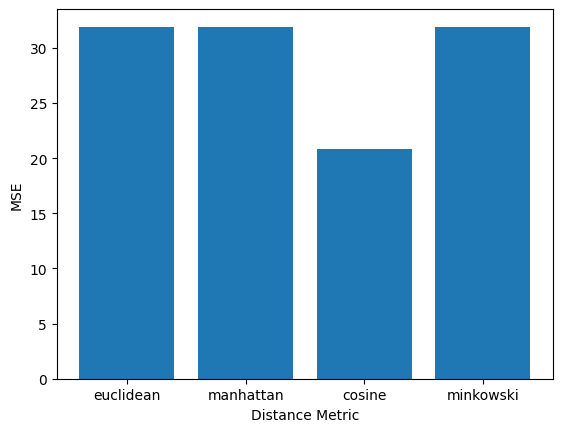

In [116]:
# Create a dictionary to store the MSE for each distance metric
mse_dict = {}

# Try different distance metrics
for metric in distance_metrics:
    # Create a kNN model
    model_knn = NearestNeighbors(n_neighbors=10, metric=metric, algorithm='brute')
    model_knn.fit(train_matrix)

    # Create a list to store the predicted ratings
    pred_ratings = []

    # Create a list to store the actual ratings
    actual_ratings = []

    # Iterate over each row in the test data
    for i, row in test_data.iterrows():
        # Get the user ID and ISBN for this row
        user_id = row['user_id']
        isbn = row['isbn']

        # Check if this user and book are present in the training data
        if user_id in train_pivot.columns and isbn in train_pivot.index:
            # Get the index of this book in the pivot table
            book_index = train_pivot.index.get_loc(isbn)

            # Find the 10 nearest neighbors of this book
            distances, indices = model_knn.kneighbors(train_pivot.iloc[book_index, :].values.reshape(1, -1), n_neighbors=10)

            # Get the ISBNs of the nearest neighbors
            neighbor_isbns = [train_pivot.index[i] for i in indices.flatten()]

            # Calculate the average rating given by this user to these books
            avg_rating = train_data[(train_data['user_id'] == user_id) & (train_data['isbn'].isin(neighbor_isbns))]['book_rating'].mean()

            # Check if avg_rating is NaN
            if pd.isna(avg_rating):
                # Skip this row or use some default value for avg_rating
                continue

            # Add this rating to the list of predicted ratings
            pred_ratings.append(avg_rating)

            # Add this rating to the list of actual ratings
            actual_ratings.append(row['book_rating'])

    # Calculate the MSE for this distance metric
    mse = mean_squared_error(actual_ratings, pred_ratings)

    # Add this MSE to the dictionary of MSEs
    mse_dict[metric] = mse

# Plot the MSE for different distance metrics
plt.bar(mse_dict.keys(), mse_dict.values())
plt.xlabel('Distance Metric')
plt.ylabel('MSE')
plt.show()


**The metric with the least mean squared error for the prediction of the rating is cosine, so we will use cosine distance metric for our km model.**

In [117]:
ratings_pivot.head()

isbn,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
user_id,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


In [119]:
# Set a minimum number of ratings
min_ratings = 100

# Filter books with at least min_ratings ratings
book_counts = ratings['isbn'].value_counts()
valid_books = book_counts[book_counts >= min_ratings].index
final_ratings = ratings[ratings['isbn'].isin(valid_books)]

min_ratings=200

# Filter users with at least min_ratings ratings
user_counts = ratings['user_id'].value_counts()
valid_users = user_counts[user_counts >= min_ratings].index
final_ratings = final_ratings[final_ratings['user_id'].isin(valid_users)]

# Create a pivot table of books and their ratings by each user for the training data
final_ratings_pivot = final_ratings.pivot(index='isbn', columns='user_id', values='book_rating').fillna(0)

In [120]:
final_ratings_pivot

user_id,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573227331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
# convert the pivot table to a sparse matrix
ratings_matrix = csr_matrix(final_ratings_pivot.values)

In [122]:
# create a KNN model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [123]:
def get_recommendations(book_title):
    # Get the ISBN for the input book
    isbn = books[books['book_title'] == book_title]['isbn'].iloc[0]

    # Get the index of the input book in the pivot table
    book_index = final_ratings_pivot.index.get_loc(isbn)

    # Find the k nearest neighbors of the input book
    distances, indices = model_knn.kneighbors(final_ratings_pivot.iloc[book_index, :].values.reshape(1, -1), n_neighbors=6)

    # Get the ISBNs of the nearest neighbors
    neighbor_isbns = [final_ratings_pivot.index[i] for i in indices.flatten()[1:]]

    # Filter books from the books dataframe
    top_books = books[books['isbn'].isin(neighbor_isbns)]

    # Add a column for the distance to the input book
    top_books['distance'] = distances.flatten()[1:]

    # dropping the images columns
    top_books.drop(['img_s', 'img_m', 'img_l'], axis=1, inplace=True)

    # Sort the books by distance in ascending order
    top_books = top_books.sort_values('distance').head()

    return top_books

**The above function takes as input a book title and returns the top 5 books most similar to the input book based on the kNN model. The function finds the k nearest neighbors of the input book and returns their ISBNs along with their distance to the input book. The top 5 books are returned along with their titles and distance to the input book.**

In [124]:
# Example usage: Get recommendations for the book 'The Lovely Bones'
recommended_books = get_recommendations('The Lovely Bones: A Novel')
display(recommended_books)

<ipython-input-123-c3fb5606fb40>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_books['distance'] = distances.flatten()[1:]
<ipython-input-123-c3fb5606fb40>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_books.drop(['img_s', 'img_m', 'img_l'], axis=1, inplace=True)


,isbn,book_title,book_author,year_of_publication,publisher,distance
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books,0.723486
1496,0743418174,Good in Bed,Jennifer Weiner,2002.0,Washington Square Press,0.763343
2536,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990.0,Anchor,0.765945
3939,0316096199,Lucky : A Memoir,Alice Sebold,2002.0,Back Bay Books,0.767395
4824,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999.0,Back Bay Books,0.776212


In [125]:
# Example usage: Get recommendations for the book 'The Lovely Bones'
recommended_books = get_recommendations('Harry Potter and the Goblet of Fire (Book 4)')
display(recommended_books)

<ipython-input-123-c3fb5606fb40>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_books['distance'] = distances.flatten()[1:]
<ipython-input-123-c3fb5606fb40>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_books.drop(['img_s', 'img_m', 'img_l'], axis=1, inplace=True)


,isbn,book_title,book_author,year_of_publication,publisher,distance
2143,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,0.365514
2809,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998.0,Scholastic,0.438796
3839,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999.0,Scholastic,0.508657
5432,0439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999.0,Scholastic,0.569225
5506,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003.0,Scholastic,0.681822


#**Future Work**


Save the best performing ml model in a pickle file or joblib file format for deployment process

In [126]:
# Save the File
import pickle

# pickle ratings pivot table
with open('top_books.pkl', 'wb') as f:
    pickle.dump(top_rated_books, f)

# pickle knn model
with open('model_knn.pkl', 'wb') as f:
    pickle.dump(model_knn, f)

# pickle books dataframe
with open('books.pkl', 'wb') as f:
    pickle.dump(books, f)

# pickle ratings pivot table
with open('ratings_pivot.pkl', 'wb') as f:
    pickle.dump(final_ratings_pivot, f)

**Model is sucessfully created and ready for deployment on a live server for a real user interaction.**

# **Conclusion**



In conclusion, this project aimed to create a book recommendation system using unsupervised learning techniques.

Recommender systems are algorithms aimed at suggesting relevant items to users. They are critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

The project involved exploring and analyzing the data, visualizing relationships between variables, and experimenting with different charts to gain insights. The data was pre-processed and cleaned to handle missing values and outliers. Several recommender systems were built, including popularity-based filtering, correlation-based recommendations, collaborative filtering using cosine similarity and k-nearest neighbors.

Important insights from EDA include:

  >>There are almost 40% missing values in the age column of the user csv.
  Outliers present in Age.

  >>A lot of zeros in the ratings that are implicit ratings.

  >>Median implicit rating is 8.

  >>There are twice as many books published in 2002 than in 1989.

  >>The most rated book is Wild Animus with 2502 ratings.

  >>The top author is Agatha Christie for most number of books and for most number of ratings is Nora Roberts.

  >>Top publisher is Harleyquin.

  >>Top countries are USA and Canada.


The different recommender systems built include:

  >>Popularity-based filtering

  >>Recommendations based on correlation

  >>Collaborative filtering using cosine similarity (User-User)

  >>Collaborative filtering using k-nearest neighbors [kNN]

The project demonstrated the potential of these techniques to generate personalized book recommendations for users.


##**END!!!**

#                                                  !!!!!!!THANKS!!!!!!